In [1]:
# Python
%matplotlib inline
from prophet import Prophet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 9, 6

d:\hike-footwear.com\hike-erp\hike-notebook\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df = pd.read_csv("records/sample2.csv", parse_dates=["Date"]).rename(
    columns={"Date": "ds", "Sold": "y", "Sale": "sale"}
)

df['cap'] = df['y'].max()
df['floor'] = 1

In [10]:
m = Prophet(growth="logistic")
m.add_seasonality(
    name="quarterly",
    period=365/2,
    fourier_order=7,  # can tune (3–9). 7 is a good start.
    prior_scale=10.0,  # allow decent wiggle for the 3-month pattern
)
m.add_country_holidays(country_name="US")
m = m.fit(df)

18:54:49 - cmdstanpy - INFO - Chain [1] start processing
18:54:49 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=90)
future['cap'] = df['cap']
future['floor'] = 1

forecast = m.predict(future)
forecast['yhat'] = np.floor(forecast['yhat'])

Text(0.5, 1.0, 'Default Prophet')

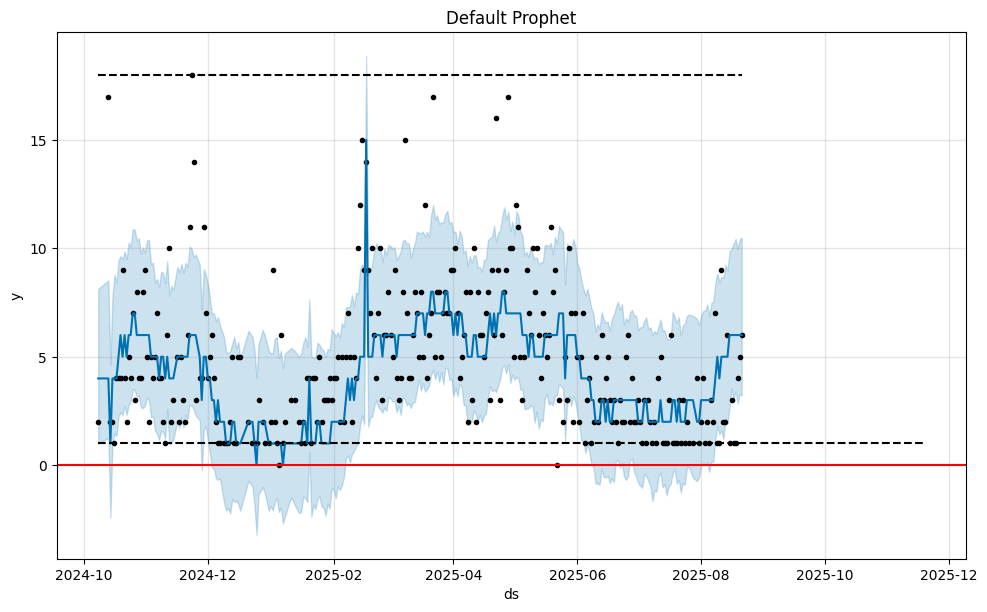

In [12]:
m.plot(forecast)
plt.axhline(y=0, color='red')
plt.title('Default Prophet')
